In [1]:
import sys; sys.path.append('../../wwa/'); from wwa import *

mapproj = cartopy.crs.PlateCarree()

xn, xx, yn, yx = [-16,20,10,17]


## Reconstruct fitted values into maps

In [2]:
def vec2map(x, mask):
    
    # reconstruct vector into map
    # create an empty map with NA in same cells as masks
    arr = mask.where(np.isnan(mask), 0)
    
    # get coordinates of non-empty cells
    px = np.argwhere(~np.isnan(mask.values))
    
    # Transfer vector values into non-empty cells in array
    if len(px) == len(x):
        for i in list(range(len(px))): arr[px[i,0], px[i,1]] = x[i]
        return arr
    else:
        print(str(len(x))+" values, but "+str(len(px))+" cells")
        return

In [39]:
varnm = "tmin"

df = merge_byindex([pd.read_csv(fnm, index_col = 0) for fnm in sorted(glob.glob("fitted/"+varnm+"_mswx_flattened-*.csv"))])
clear_output(wait = False) # because there will be a LOT of warnings about repeated column names

tmplt = xr.open_dataset("fitted/"+varnm+"_mswx_flattened-tmplt.nc")[varnm]
mdl_res = xr.merge([vec2map(df.loc[r], tmplt).rename(r) for r in df.index])
mdl_res.to_netcdf("fitted/"+varnm+"_gridded_mswx.nc")

In [42]:
tmax, tmin = [xr.open_dataset("fitted/"+varnm+"_gridded_mswx.nc") for varnm in ["tmax", "tmin"]]

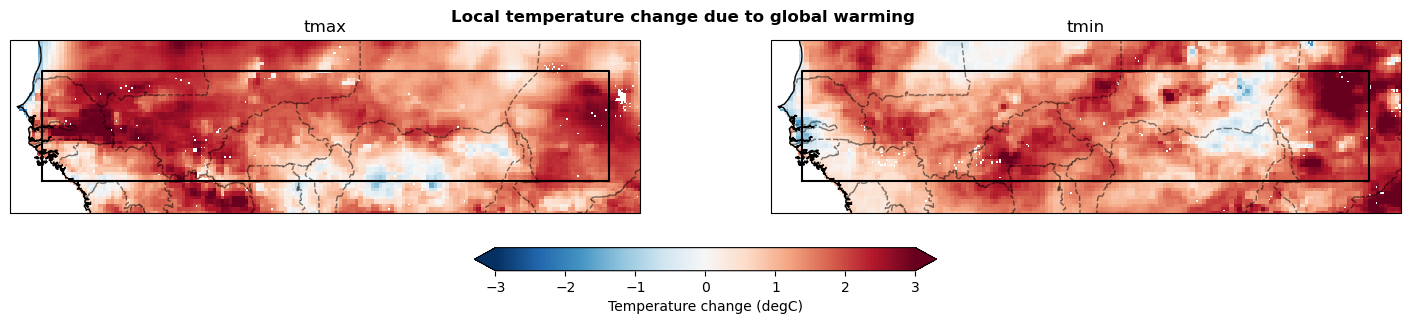

In [57]:
# 
fig, axs = plt.subplots(ncols = 2, figsize = (18,3), dpi = 100, subplot_kw = {"projection" : mapproj})

for i in range(2):
    ax = axs[i]
    varnm = ["tmax", "tmin"][i]
    
    mdl_res = eval(varnm)
    cbar = mdl_res.dI_abs_pi.plot(ax = ax, vmin = -3, vmax = 3, cmap = "RdBu_r", add_colorbar = False)

    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, color = "k", alpha = 0.5, ls = "--")
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "k", lw = 1.5)
    ax.set_title(varnm)
    
plt.suptitle("Local temperature change due to global warming", fontweight = "bold")
plt.colorbar(cbar, ax = axs, location = "bottom", fraction = 0.1, extend = "both", label = "Temperature change (degC)")

plt.savefig("fig/gridded-change-maps.png")

In [58]:
log(1)

NameError: name 'log' is not defined